## Credit Card Fraud detection(Logistic Regression)

In [121]:
#Importing the libraries

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



## Importing the dataset

In [123]:
dataset = pd.read_csv(r"C:\Users\Adnan - PC\OneDrive\Desktop\dataset\fraudTest.csv.zip")

In [124]:
dataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


## Data Preprocessing

In [125]:
# dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [126]:
dataset= dataset[['amt','gender','is_fraud']]
dataset.head()


,amt,gender,is_fraud
0,2.86,M,0
1,29.84,F,0
2,41.28,F,0
3,60.05,M,0
4,3.19,M,0


In [127]:
#dataset statistics
dataset.describe()

,amt,is_fraud
count,555719.000000,555719.000000
mean,69.392810,0.003860
std,156.745941,0.062008
min,1.000000,0.000000
25%,9.630000,0.000000
50%,47.290000,0.000000
75%,83.010000,0.000000
max,22768.110000,1.000000


In [128]:
dataset.isnull().sum()


amt         0
gender      0
is_fraud    0
dtype: int64

## Feature Engineering

In [129]:
#dividing the dataset into x and y
x = dataset.drop(columns={"is_fraud"},axis =1)
y = dataset["is_fraud"]

In [130]:
# x and y shape
x.shape,y.shape

((555719, 2), (555719,))

In [131]:
#columns description
dataset.columns

Index(['amt', 'gender', 'is_fraud'], dtype='object')

In [132]:
dataset['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

## Splitting the dataset into the Training set and Test set

In [133]:
#importing the module

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [134]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x_train['gender']=le.fit_transform(x_train[['gender']])
x_test['gender']=le.transform(x_test[['gender']])


In [135]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
x_train,y_train= smt.fit_resample(x_train,y_train)

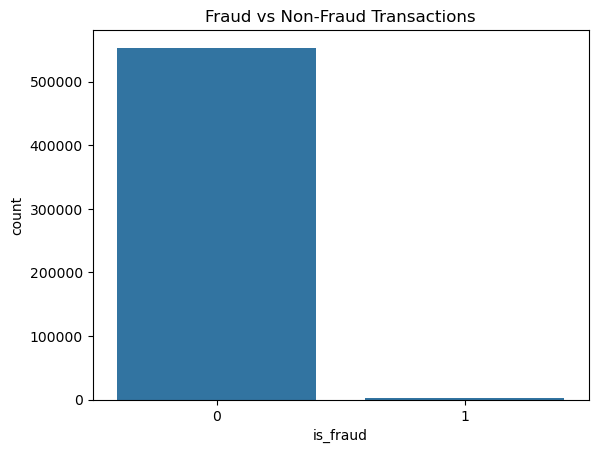

In [151]:
sns.countplot(x=dataset["is_fraud"])
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

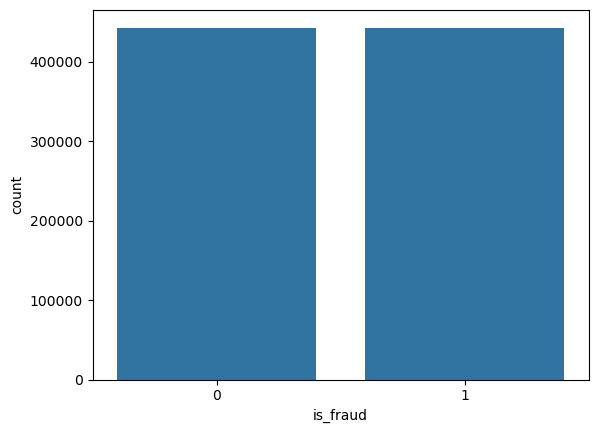

In [155]:
sns.countplot(x=y_train)
plt.show()

## Feature Scaling

In [136]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Training the Logistic Regression model on the Training set

In [137]:
from sklearn.linear_model import LogisticRegression
c = LogisticRegression(C=1.0)
c.fit(x_train, y_train)

LogisticRegression()

## Predicting the Test set results

In [138]:
y_pred = c.predict(x_test)

In [139]:
calculation = pd.DataFrame(np.c_[y_test,y_pred], columns = ["Original Class","Predict Class"])
calculation.tail(1000)

,Original Class,Predict Class
110144,0,1
110145,0,0
110146,0,0
110147,0,0
110148,0,0
...,...,...
111139,0,0
111140,0,0
111141,0,0
111142,0,0


## Computing the accuracy

In [140]:
#importing module for computing
from sklearn.metrics import accuracy_score

In [141]:
# TRAINING DATA ACCURACY
x_pred = c.predict(x_train)

In [142]:
accuracy_score_train= accuracy_score(y_train,x_pred)

In [143]:
print("Accuracy score of training data: " + str(accuracy_score_train))

Accuracy score of training data: 0.8482300715106657


In [144]:
#TESTING DATA ACCURACY
accuracy_score_test= accuracy_score(y_test,y_pred)

In [145]:
print("Accuracy score of testing data: " + str(accuracy_score_test))

Accuracy score of testing data: 0.9425160152594831


In [146]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    110703
           1       0.05      0.75      0.09       441

    accuracy                           0.94    111144
   macro avg       0.52      0.85      0.53    111144
weighted avg       1.00      0.94      0.97    111144



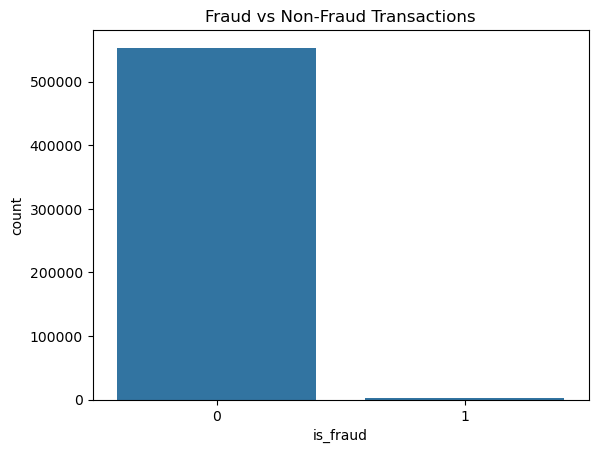